In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_column", None)
pd.set_option("display.max_row", None)

df = pd.read_csv("emlak_verisi_newd.csv")

In [75]:
df.head()

,Unnamed: 0,Sehir,İlce,Mahalle,Fiyat,brüt metrekare,Net Metrekare,Oda Sayısı,Binanın Yaşı,Bulunduğu Kat
0,0,İstanbul,Kartal,Cumhuriyet Mahallesi,1890000,107,70,2+1,5-10,20
1,1,İstanbul,Kartal,Çavuşoğlu Mahallesi,1310000,120,105,3+1,0 (Yeni),Bahçe Katı
2,2,İstanbul,Başakşehir,Kayabaşı Mahallesi,900000,75,68,2+1,5-10,5
3,3,İstanbul,Beylikdüzü,Adnan Kahveci Mahallesi,1575000,200,185,3+1,11-15,5
4,4,İstanbul,Eyüpsultan,Nişancı Mahallesi,775000,100,90,2+1,21 Ve Üzeri,4


In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1410.0,7.045000e+02,4.071763e+02,0.0,352.25,704.5,1056.75,1409.0
Fiyat,1410.0,7.238068e+06,3.816475e+07,247000.0,529900.00,749900.0,1575000.00,761000000.0
brüt metrekare,1410.0,1.779504e+02,2.296416e+02,50.0,110.00,127.0,155.00,1500.0
Net Metrekare,1410.0,1.508809e+02,1.686609e+02,42.0,100.00,110.0,136.00,1100.0


In [8]:
## BRÜT METREKARE 

for i in range(len(df['brüt metrekare'])):
     
        x = df['brüt metrekare'][i].split(" M2")
        df['brüt metrekare'][i] = x[0]

for t in range(len(df['brüt metrekare'])):
    
    if(len(df['brüt metrekare'][t]) > 3):
        
        x = df['brüt metrekare'][t].split(".")
        a = x[0]
        b = x[1]
        df['brüt metrekare'][t] = a + b

AttributeError: 'numpy.int64' object has no attribute 'split'

In [9]:
## FİYAT

for i in range(len(df.Fiyat)):
    
    if  df['Fiyat'][i].isnumeric() == False:
        
        x = df['Fiyat'][i].split("TLarrow_downward")
        df['Fiyat'][i]=x[0]
        
df.astype({'Fiyat': 'int64'}).dtypes

AttributeError: 'numpy.int64' object has no attribute 'isnumeric'

In [10]:
## NET METREKARE

for i in range(len(df['Net Metrekare'])):
     
    x = df['Net Metrekare'][i].split(" M2")
    df['Net Metrekare'][i] = x[0]

AttributeError: 'numpy.int64' object has no attribute 'split'

In [11]:
## NET METREKARE

for i in range(len(df['Net Metrekare'])): 
    
    if(len(df['Net Metrekare'][i]) > 3):
        
        x = df['Net Metrekare'][i].split(".")
        a = x[0]
        b = x[1]
        df['Net Metrekare'][i] = a + b

TypeError: object of type 'numpy.int64' has no len()

In [12]:
## NET METREKARE

liste = []

for i in range(len(df['Net Metrekare'])):
    if(df['Net Metrekare'][i] == '-'):
        
        liste.append(i)
    
    sayac = 0
    
for j in range(len(liste)):

    df = df.drop(df.index[liste[j] - sayac])
    sayac += 1
    df = df.reset_index(drop = True)

In [13]:
df = df.astype({"Fiyat": 'int64',"brüt metrekare": 'int64', "Net Metrekare": 'int64'})
##df.Fiyat = df.Fiyat.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410 entries, 0 to 1409
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1410 non-null   int64 
 1   Sehir           1410 non-null   object
 2   İlce            1410 non-null   object
 3   Mahalle         1410 non-null   object
 4   Fiyat           1410 non-null   int64 
 5   brüt metrekare  1410 non-null   int64 
 6   Net Metrekare   1410 non-null   int64 
 7   Oda Sayısı      1410 non-null   object
 8   Binanın Yaşı    1410 non-null   object
 9   Bulunduğu Kat   1410 non-null   object
dtypes: int64(4), object(6)
memory usage: 110.3+ KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1410.0,7.045000e+02,4.071763e+02,0.0,352.25,704.5,1056.75,1409.0
Fiyat,1410.0,7.238068e+06,3.816475e+07,247000.0,529900.00,749900.0,1575000.00,761000000.0
brüt metrekare,1410.0,1.779504e+02,2.296416e+02,50.0,110.00,127.0,155.00,1500.0
Net Metrekare,1410.0,1.508809e+02,1.686609e+02,42.0,100.00,110.0,136.00,1100.0


In [15]:
df.İlce.value_counts()

Beylikdüzü       709
Bahçelievler     129
Küçükçekmece      93
Esenyurt          93
Avcılar           87
Çekmeköy          45
Beykoz            40
Fatih             40
Maltepe           19
Pendik            18
Kadıköy           13
Sarıyer           11
Şişli              9
Eyüpsultan         9
Başakşehir         8
Kartal             8
Esenler            8
Sultanbeyli        7
Ataşehir           7
Büyükçekmece       7
Beşiktaş           6
Bağcılar           6
Ümraniye           5
Beyoğlu            4
Tuzla              4
Arnavutköy         4
Bakırköy           4
Üsküdar            3
Sancaktepe         3
Silivri            3
Zeytinburnu        2
Güngören           2
Kağıthane          2
Gaziosmanpaşa      1
Bayrampaşa         1
Name: İlce, dtype: int64

<AxesSubplot:>

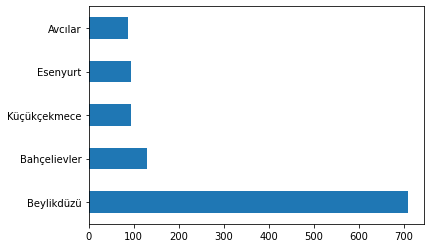

In [16]:
df.İlce.value_counts().head().plot.barh()

In [17]:
df["Oda Sayısı"].value_counts()

2+1       641
3+1       493
5+2       118
1+1        61
6+1        41
4+1        15
3+2        10
4+2         7
5+1         6
6+2         5
1 Oda       3
7+2         3
6+3         1
3.5+1       1
8+ Oda      1
2+0         1
2+2         1
5+3         1
Stüdyo      1
Name: Oda Sayısı, dtype: int64

<AxesSubplot:>

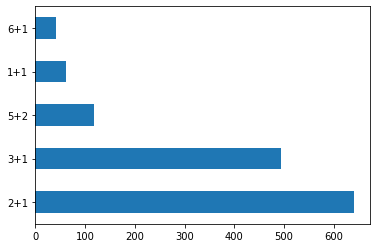

In [18]:
df["Oda Sayısı"].value_counts().head().plot.barh()

In [19]:
df["Binanın Yaşı"].value_counts().head()

0 (Yeni)       544
21 Ve Üzeri    316
4              205
5-10           133
16-20           81
Name: Binanın Yaşı, dtype: int64

<AxesSubplot:>

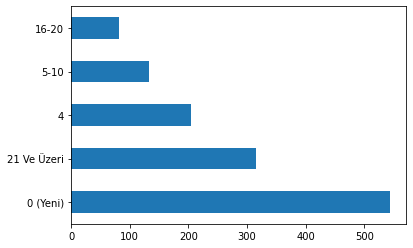

In [20]:
df["Binanın Yaşı"].value_counts().head().plot.barh()

In [21]:
df["Bulunduğu Kat"].value_counts()

2               373
1               298
4               101
Yüksek Giriş     95
Çatı Dubleks     82
3                66
5                60
Bahçe Katı       53
8                46
Villa Tipi       46
Müstakil         45
10               41
15               39
Düz Giriş        22
6                 9
9                 8
13                5
7                 4
11                3
12                2
20                2
18                2
28                2
Kot 1 (-1)        2
Bahçe Dublex      1
Çatı Katı         1
Kot 3 (-3)        1
21                1
Name: Bulunduğu Kat, dtype: int64

<AxesSubplot:>

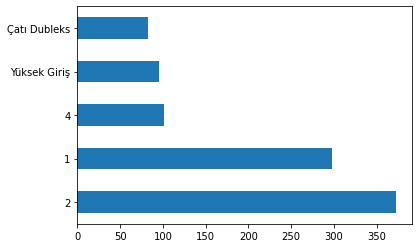

In [22]:
df["Bulunduğu Kat"].value_counts().head().plot.barh()

In [23]:
df["Oda Sayısı"].value_counts()

2+1       641
3+1       493
5+2       118
1+1        61
6+1        41
4+1        15
3+2        10
4+2         7
5+1         6
6+2         5
1 Oda       3
7+2         3
6+3         1
3.5+1       1
8+ Oda      1
2+0         1
2+2         1
5+3         1
Stüdyo      1
Name: Oda Sayısı, dtype: int64

<AxesSubplot:>

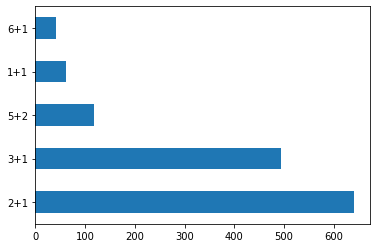

In [24]:
df["Oda Sayısı"].value_counts().head().plot.barh()

In [25]:
df["brüt metrekare"].value_counts()

110     202
120     128
100     126
165      84
130      83
140      82
115      80
160      46
135      45
150      44
220      43
105      43
270      40
127      38
146      38
210      38
141      38
1500     38
90       17
85       12
125      11
80       10
95       10
145       8
55        4
450       4
155       4
300       4
200       4
75        4
74        3
167       3
190       3
180       3
92        3
230       2
185       2
350       2
500       2
178       2
107       2
119       2
240       2
189       2
255       2
65        2
170       1
164       1
275       1
124       1
139       1
102       1
192       1
245       1
152       1
128       1
177       1
112       1
305       1
117       1
87        1
109       1
83        1
78        1
390       1
162       1
174       1
86        1
228       1
395       1
900       1
50        1
82        1
246       1
60        1
216       1
800       1
157       1
670       1
550       1
340       1
111       1
290       1
99  

<AxesSubplot:>

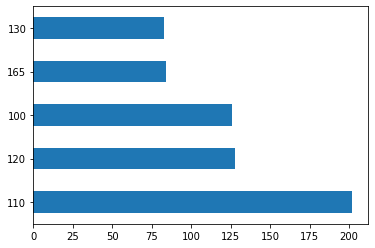

In [26]:
df["brüt metrekare"].value_counts().head().plot.barh()

In [27]:
df["Net Metrekare"].value_counts()

100     169
120     159
90      131
110      88
95       83
105      83
102      77
140      50
150      49
115      44
125      44
200      43
250      41
87       39
136      38
146      38
205      38
1100     38
80       20
75       17
85       17
70        7
160       6
130       6
50        5
170       4
68        3
55        3
400       3
180       3
330       2
230       2
165       2
270       2
65        2
133       2
106       2
220       2
73        2
147       2
45        2
135       2
60        2
107       2
185       1
320       1
108       1
128       1
175       1
304       1
260       1
190       1
800       1
450       1
78        1
99        1
325       1
300       1
142       1
49        1
155       1
93        1
500       1
245       1
227       1
215       1
72        1
799       1
101       1
510       1
42        1
77        1
145       1
198       1
394       1
1000      1
84        1
63        1
550       1
235       1
Name: Net Metrekare, dtype: int64

<AxesSubplot:>

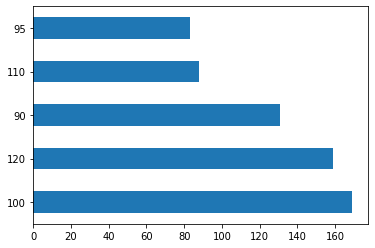

In [28]:
df["Net Metrekare"].value_counts().head().plot.barh()

In [29]:
df["brüt metrekare"].describe()

count    1410.000000
mean      177.950355
std       229.641608
min        50.000000
25%       110.000000
50%       127.000000
75%       155.000000
max      1500.000000
Name: brüt metrekare, dtype: float64

In [30]:
df["Net Metrekare"].describe()

count    1410.000000
mean      150.880851
std       168.660901
min        42.000000
25%       100.000000
50%       110.000000
75%       136.000000
max      1100.000000
Name: Net Metrekare, dtype: float64

Text(0, 0.5, '')

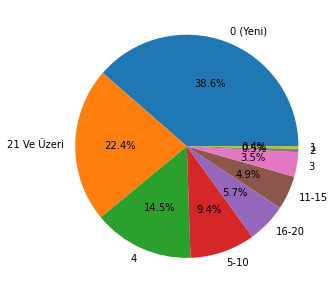

In [70]:
fig = plt.figure(figsize=(5,15))
df["Binanın Yaşı"].value_counts().plot(kind = 'pie',autopct='%.1f%%');
plt.ylabel("", fontsize = 10)

Text(0, 0.5, 'Oda Sayısı')

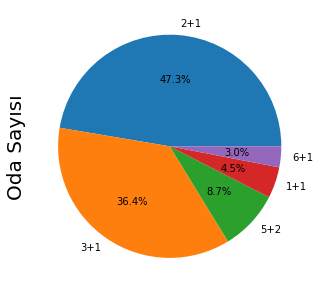

In [62]:
fig = plt.figure(figsize=(5,15))
df["Oda Sayısı"].value_counts().head().plot(kind = 'pie',autopct='%.1f%%');
plt.ylabel("Oda Sayısı", fontsize = 20)

Text(0, 0.5, 'Bulunduğu Kat')

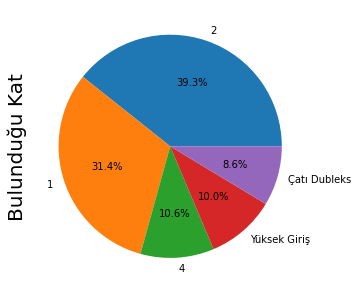

In [33]:
fig = plt.figure(figsize=(5,15))
df["Bulunduğu Kat"].value_counts().head().plot(kind = 'pie',autopct='%.1f%%');
plt.ylabel("Bulunduğu Kat", fontsize = 20)

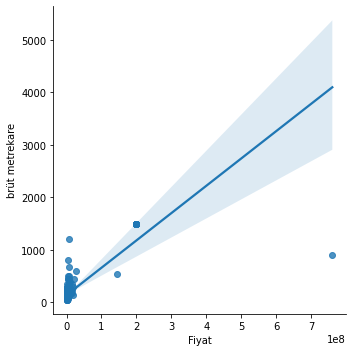

In [34]:
sns.lmplot(x='Fiyat', y='brüt metrekare', data=df)

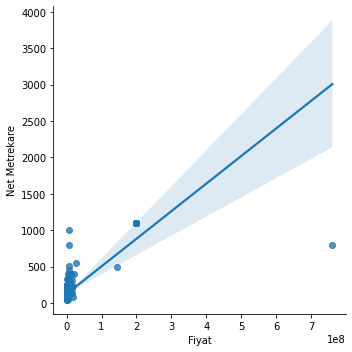

In [35]:
sns.lmplot(x='Fiyat', y='Net Metrekare', data=df)

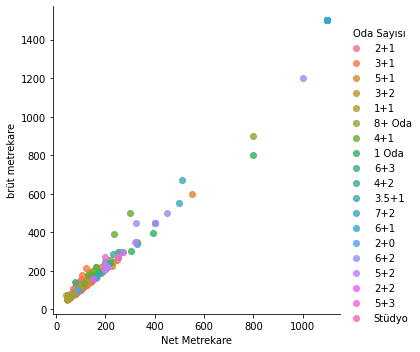

In [36]:
sns.lmplot(x = 'Net Metrekare', y = 'brüt metrekare', fit_reg = False, hue = 'Oda Sayısı', data = df)

<AxesSubplot:xlabel='Binanın Yaşı', ylabel='count'>

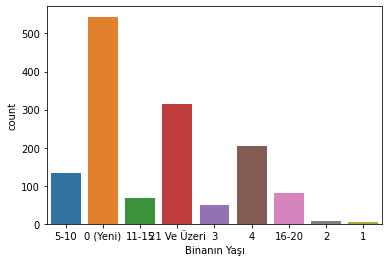

In [37]:
sns.countplot(x='Binanın Yaşı', data=df)